In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import ast
import json
from scipy.optimize import curve_fit

In [14]:
def grab_data(date, file) :
    file_name = file + '_PROB_' + date + '.csv'

    DATA_FILE_PATH = "C:/Users/LABadmin/Documents/Jarvis/data"

    with open(DATA_FILE_PATH + '/' + date + '/' + file_name, newline='') as f:
        lis = [line.split() for line in f]        # create a list of lists

    dic = ''
    for string in lis[0] :
        dic = dic  + string
    dic = dic.replace("\"\"", "'")
    dic = eval(ast.literal_eval(dic))

    probs = np.array(eval(str(lis[2]).replace('\'', '')))/100
    
    nsteps = dic['steps']

    phases = np.arange(dic['det'], dic['det'] + len(probs)*dic['step'], dic['step'])
   
    return phases, probs

In [32]:
def compute_ramsey_amps(date, filelist, plot = False) :
  
    phases = []
    probs = []
    phases, probs = grab_data(date, file)


    def Ramsey(phi, phi0, A) :
        return A/2*np.sin(phi + phi0) + 0.5
 
    ini_fit = [0, 1]
    popt, pcov = curve_fit(Ramsey, phases, probs,ini_fit, bounds = [[0, 0],[2*np.pi, 1]])
    phi0fit = popt[0]
    Afit = popt[1]
    
    if plot :

        phase_plot = np.linspace(0, 2*np.pi, 1000)
        plt.plot(phase_plot, Ramsey(phase_plot, phi0fit, A0fit))
        plt.scatter(phases, probs)
        
    return phi0fit, Afit

In [67]:
date = '201005'
filelist = ['009', '010', '011', '012', '013', '014']
delaylist = np.array([0, 500, 100, 200, 300, 400])*1e-6

Alist = []
phi0list = []

for file in filelist :
    phi0, A = compute_ramsey_amps(date, file)
    phi0list = np.append(phi0list, phi0)
    Alist = np.append(Alist, A)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

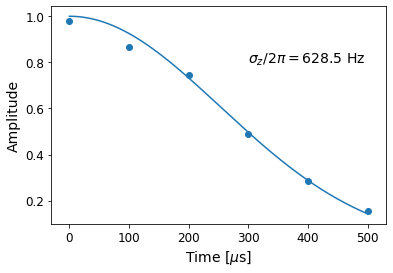

In [87]:
def ramsey_decay(t, sz) :
    return np.exp(- 0.5 * sz**2 * t**2)

popt, pcov = curve_fit(ramsey_decay, delaylist, Alist, [1e3], bounds = [[0],[1e6]])

szfit = popt[0]

t_plot = np.linspace(0, np.max(delaylist), 1000)
plt.plot(1e6*t_plot, ramsey_decay(t_plot, szfit))
plt.scatter(1e6*delaylist, Alist)
plt.xlabel(r'Time [$\mu$s]', fontsize = 14)
plt.ylabel(r'Amplitude', fontsize = 14)
plt.text(300, 0.8, r'$\sigma_z/2\pi = $' + '%.1f'%(szfit/(2*np.pi)) + r' Hz', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)